Topic 6.5  |  四维曲面
# 可视化三维瑞利商
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 0. 球坐标

In [7]:
# Creating the theta and phi values.

intervals = 50
ntheta = intervals
nphi = 2*intervals

# 单位球坐标
theta = np.linspace(0, np.pi*1, ntheta+1)
phi   = np.linspace(0, np.pi*2, nphi+1)

# 球坐标转化为三维直角坐标
X = np.outer(np.sin(theta), np.cos(phi))
Y = np.outer(np.sin(theta), np.sin(phi))
Z = np.outer(np.cos(theta), np.ones(nphi+1))

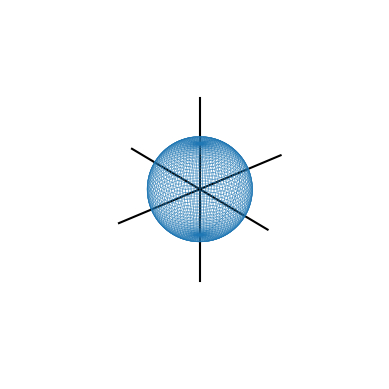

In [30]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1,
               linewidth=0.25)

surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 2
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
fig.savefig('Figures/单位球.svg', format='svg')

### 1. 计算瑞利商
参考：
https://en.wikipedia.org/wiki/Rayleigh_quotient  
https://www.chebfun.org/examples/sphere/RayleighQuotientExample.html

In [8]:
Points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])
A = np.array([[1, 0.5, 1],
              [0.5, 2, -0.2],
              [1, -0.2, 1]])
Rayleigh_Q = np.diag(Points @ A @ Points.T)
Rayleigh_Q_ = np.reshape(Rayleigh_Q,X.shape)

### 2. 填充

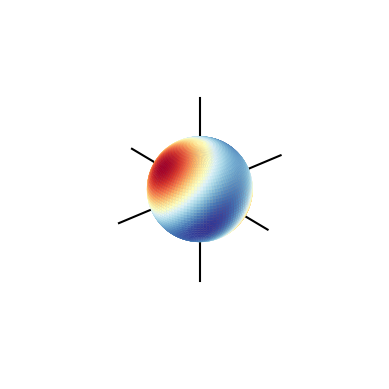

In [32]:
norm_plt = plt.Normalize(Rayleigh_Q_.min(), Rayleigh_Q_.max())
colors = cm.RdYlBu(norm_plt(Rayleigh_Q_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
               linewidth=0.25, shade=False)

# surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 2
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
fig.savefig('Figures/瑞利商，填充.svg', format='svg')

### 3. 只有网格

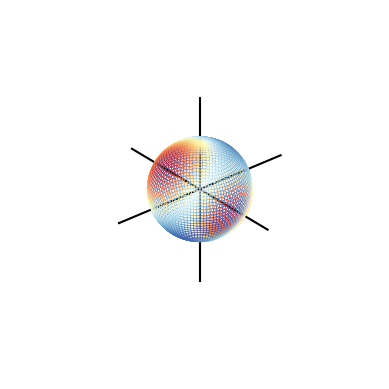

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
               linewidth=0.25, shade=False)

surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
fig.savefig('Figures/瑞利商，网格.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023